<a href="https://colab.research.google.com/github/KiariWilliams/COVID19-Case-Analysis-2019/blob/main/COVID19_Case_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COVID19 Case Analysis 2021

Coronavirus is a global pandemic that is affecting the country at a rapid rate. Currently there are over 2 million confirmed cases and the numbers are steadily rising resulting in a massive amount of deaths. This case anlysis utilized COVID-19 data that includes a continuous count of confirmed cases and deaths due to the Coronavirus.

Data is from *https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_deaths_global.csv&filename=time_series_covid19_deaths_global.csv*

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Importing our libraries and the 2021 COVID19 Global Death data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


df = pd.read_csv("time_series_covid19_deaths_global.csv")

/content/gdrive/My Drive/Colab Notebooks/Datasets


###Preprocessing the Data for Analysis
Displaying the data by week intstead of by day

In [ ]:
death_data = df.copy()

death_data.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,12/5/21,12/6/21,12/7/21,12/8/21,12/9/21,12/10/21,12/11/21,12/12/21,12/13/21,12/14/21,12/15/21,12/16/21,12/17/21,12/18/21,12/19/21,12/20/21,12/21/21,12/22/21,12/23/21,12/24/21,12/25/21,12/26/21,12/27/21,12/28/21,12/29/21,12/30/21,12/31/21,1/1/22,1/2/22,1/3/22,1/4/22,1/5/22,1/6/22,1/7/22,1/8/22,1/9/22,1/10/22,1/11/22,1/12/22,1/13/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,7312,7316,7317,7319,7321,7324,7325,7328,7328,7329,7331,7332,7332,7333,7335,7335,7335,7341,7346,7348,7349,7354,7354,7355,7356,7356,7356,7356,7361,7364,7365,7367,7367,7368,7369,7373,7373,7374,7376,7376
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3110,3115,3122,3126,3128,3130,3132,3134,3140,3144,3152,3156,3158,3161,3166,3172,3178,3180,3181,3187,3189,3194,3194,3207,3212,3212,3217,3217,3220,3220,3224,3224,3228,3233,3233,3240,3241,3247,3253,3255
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,6103,6111,6114,6122,6126,6132,6137,6145,6151,6155,6165,6171,6175,6180,6184,6190,6198,6205,6213,6222,6229,6238,6246,6254,6263,6271,6276,6284,6291,6298,6303,6310,6318,6325,6330,6339,6349,6363,6372,6383
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,132,133,133,133,133,133,133,133,133,134,134,134,134,134,134,137,137,138,139,139,139,139,139,140,140,140,140,140,140,140,141,141,141,141,141,141,141,141,141,141
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1735,1735,1735,1735,1736,1737,1737,1737,1737,1737,1737,1737,1738,1738,1738,1738,1738,1741,1743,1746,1746,1749,1749,1756,1760,1764,1770,1772,1772,1775,1778,1789,1799,1809,1819,1826,1832,1840,1842,1847


In [ ]:
death_data.shape

(280, 727)

Looking at data we can see that Province/State has null values in the majority of the rows in the dataset, so will proceed to drop this column.

In [ ]:
death_data.isnull().sum()

Province/State    193
Country/Region      0
Lat                 2
Long                2
1/22/20             0
                 ... 
1/9/22              0
1/10/22             0
1/11/22             0
1/12/22             0
1/13/22             0
Length: 727, dtype: int64

In [ ]:
death_data.drop('Province/State', axis= 1, inplace = True)

##Indexing dataframe

This analysis will be on covid death data from the last 365 days since these records have been updated.

In [ ]:
covid_df = pd.DataFrame(death_data[list(death_data.columns[0:3]) + list(death_data.columns[360:])])

covid_df

,Country/Region,Lat,Long,1/13/21,1/14/21,1/15/21,1/16/21,1/17/21,1/18/21,1/19/21,1/20/21,1/21/21,1/22/21,1/23/21,1/24/21,1/25/21,1/26/21,1/27/21,1/28/21,1/29/21,1/30/21,1/31/21,2/1/21,2/2/21,2/3/21,2/4/21,2/5/21,2/6/21,2/7/21,2/8/21,2/9/21,2/10/21,2/11/21,2/12/21,2/13/21,2/14/21,2/15/21,2/16/21,2/17/21,2/18/21,...,12/5/21,12/6/21,12/7/21,12/8/21,12/9/21,12/10/21,12/11/21,12/12/21,12/13/21,12/14/21,12/15/21,12/16/21,12/17/21,12/18/21,12/19/21,12/20/21,12/21/21,12/22/21,12/23/21,12/24/21,12/25/21,12/26/21,12/27/21,12/28/21,12/29/21,12/30/21,12/31/21,1/1/22,1/2/22,1/3/22,1/4/22,1/5/22,1/6/22,1/7/22,1/8/22,1/9/22,1/10/22,1/11/22,1/12/22,1/13/22
0,Afghanistan,33.939110,67.709953,2308,2314,2324,2336,2339,2343,2346,2354,2363,2370,2373,2378,2385,2389,2389,2397,2399,2400,2400,2404,2405,2406,2407,2407,2408,2410,2413,2414,2418,2419,2424,2427,2427,2427,2428,2428,2430,...,7312,7316,7317,7319,7321,7324,7325,7328,7328,7329,7331,7332,7332,7333,7335,7335,7335,7341,7346,7348,7349,7354,7354,7355,7356,7356,7356,7356,7361,7364,7365,7367,7367,7368,7369,7373,7373,7374,7376,7376
1,Albania,41.153300,20.168300,1256,1261,1265,1270,1277,1281,1287,1291,1296,1303,1310,1315,1324,1332,1339,1350,1358,1369,1380,1393,1398,1404,1418,1433,1446,1460,1472,1488,1503,1517,1531,1543,1555,1567,1582,1600,1617,...,3110,3115,3122,3126,3128,3130,3132,3134,3140,3144,3152,3156,3158,3161,3166,3172,3178,3180,3181,3187,3189,3194,3194,3207,3212,3212,3217,3217,3220,3220,3224,3224,3228,3233,3233,3240,3241,3247,3253,3255
2,Algeria,28.033900,1.659600,2819,2822,2827,2831,2836,2840,2843,2849,2853,2856,2861,2863,2866,2871,2877,2881,2884,2888,2891,2894,2898,2900,2904,2909,2909,2914,2918,2924,2926,2930,2932,2935,2939,2943,2945,2947,2950,...,6103,6111,6114,6122,6126,6132,6137,6145,6151,6155,6165,6171,6175,6180,6184,6190,6198,6205,6213,6222,6229,6238,6246,6254,6263,6271,6276,6284,6291,6298,6303,6310,6318,6325,6330,6339,6349,6363,6372,6383
3,Andorra,42.506300,1.521800,87,88,88,91,91,91,92,92,93,93,96,96,97,97,98,100,100,101,101,101,102,103,103,104,105,106,106,106,106,106,106,107,107,107,107,107,107,...,132,133,133,133,133,133,133,133,133,134,134,134,134,134,134,137,137,138,139,139,139,139,139,140,140,140,140,140,140,140,141,141,141,141,141,141,141,141,141,141
4,Angola,-11.202700,17.873900,424,425,428,431,436,439,442,444,448,452,457,459,461,462,462,464,464,464,466,466,468,470,473,474,475,475,475,478,487,487,490,491,492,493,494,496,498,...,1735,1735,1735,1735,1736,1737,1737,1737,1737,1737,1737,1737,1738,1738,1738,1738,1738,1741,1743,1746,1746,1749,1749,1756,1760,1764,1770,1772,1772,1775,1778,1789,1799,1809,1819,1826,1832,1840,1842,1847
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,Vietnam,14.058324,108.277199,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,...,26260,26483,26700,26930,27186,27402,27611,27839,28081,28333,28616,28857,29103,29351,29566,29791,30041,30251,30531,30766,31007,31214,31418,31632,31877,32168,32394,32610,32831,33021,33245,33475,33644,33877,34117,34319,34531,34787,34964,35170
276,West Bank and Gaza,31.952200,35.233200,1658,1665,1687,1700,1718,1726,1741,1751,1757,1769,1783,1791,1796,1803,1808,1812,1823,1831,1833,1840,1849,1857,1865,1867,1870,1881,1888,1897,1909,1910,1918,1930,1933,1936,1942,1948,1956,...,4810,4817,4822,4823,4826,4830,4830,4830,4844,4846,4855,4855,4855,4855,4855,4870,4875,4882,4884,4884,4884,4884,4907,4912,4919,4919,4919,4919,4919,4919,4947,4954,4954,4954,4954,4954,4987,4993,4993,5005
277,Yemen,15.552727,48.516388,612,612,612,612,612,612,612,612,614,614,615,615,615,615,615,615,615,615,615,615,615,615,615,615,615,615,615,615,616,616,616,616,617,617,618,618,618,...,1954,1955,1955,1956,1957,1962,1968,1971,1972,1972,197

In [ ]:
covid_df.shape

(280, 369)

In [ ]:
print(covid_df.shape)

print(covid_df.isna().sum())

(280, 369)
Country/Region    0
Lat               2
Long              2
1/13/21           0
1/14/21           0
                 ..
1/9/22            0
1/10/22           0
1/11/22           0
1/12/22           0
1/13/22           0
Length: 369, dtype: int64


##Displaying Columns by Week Rather than by Day
To create a simplified data frame we will consolidate individual day columns into weeks. This step will help to easily understand and visualize the data analysis. These weeks will be based on week of observation and not calendar week.

Note: All column dates will be in the format of MM/DD. All column dates are in the year 2021.

In [ ]:
covid_df.columns

Index(['Country/Region', 'Lat', 'Long', '1/13/21', '1/14/21', '1/15/21',
       '1/16/21', '1/17/21', '1/18/21', '1/19/21',
       ...
       '1/4/22', '1/5/22', '1/6/22', '1/7/22', '1/8/22', '1/9/22', '1/10/22',
       '1/11/22', '1/12/22', '1/13/22'],
      dtype='object', length=369)

In [ ]:
covid_df['WK 1: 01/20 - 01/26'] = covid_df['1/26/21']
covid_df['WK 2: 01/22 - 01/28'] = covid_df['1/28/21']
covid_df['WK 3: 01/29 - 02/04'] = covid_df['2/4/21']
covid_df['WK 4: 02/05 - 02/11'] = covid_df['2/11/21']
covid_df['WK 5: 02/12 - 02/18'] = covid_df['2/18/21']
covid_df['WK 6: 02/19 - 02/25'] = covid_df['2/25/21']
covid_df['WK 7: 02/26 - 03/04'] = covid_df['3/4/21']
covid_df['WK 8: 03/05 - 03/11'] = covid_df['3/11/21']
covid_df['WK 9: 03/12 - 03/18'] = covid_df['3/18/21']
covid_df['WK 10: 03/19 - 03/25'] = covid_df['3/25/21']
covid_df['WK 11: 03/25 - 03/31'] = covid_df['3/31/21']
covid_df['WK 12: 04/01 - 04/06'] = covid_df['4/6/21']
covid_df['WK 13: 04/07 - 04/13'] = covid_df['4/13/21']
covid_df['WK 14: 04/14 - 04/20'] = covid_df['4/20/21']
covid_df['WK 15: 04/21 - 04/27'] = covid_df['4/27/21']
covid_df['WK 16: 04/28 - 05/03'] = covid_df['5/3/21']
covid_df['WK 17: 05/04 - 05/10'] = covid_df['5/10/21']
covid_df['WK 18: 05/11 - 05/17'] = covid_df['5/17/21']
covid_df['WK 19: 05/17 - 05/22'] = covid_df['5/22/21']
covid_df['WK 20: 05/23 - 05/29'] = covid_df['5/29/21']
covid_df['WK 21: 05/30 - 06/05'] = covid_df['6/5/21']
covid_df['WK 22: 06/06 - 06/12'] = covid_df['6/12/21']
covid_df['WK 23: 06/13 - 06/19'] = covid_df['6/19/21']
covid_df['WK 24: 06/20 - 06/26'] = covid_df['6/26/21']
covid_df['WK 25: 06/27 - 07/03'] = covid_df['7/3/21']
covid_df['WK 26: 07/04 - 07/10'] = covid_df['7/10/21']
covid_df['WK 27: 07/11 - 07/16'] = covid_df['7/16/21']
covid_df['WK 28: 07/17 - 07/23'] = covid_df['7/23/21']
covid_df['WK 29: 07/24 - 07/30'] = covid_df['7/30/21']
covid_df['WK 30: 07/31 - 08/06'] = covid_df['8/6/21']
covid_df['WK 31: 08/07 - 08/13'] = covid_df['8/13/21']
covid_df['WK 32: 08/13 - 08/19'] = covid_df['8/19/21']
covid_df['WK 33: 08/20 - 08/26'] = covid_df['8/26/21']
covid_df['WK 34: 08/27 - 09/02'] = covid_df['9/2/21']
covid_df['WK 35: 09/03 - 09/09'] = covid_df['9/9/21']
covid_df['WK 36: 09/10 - 09/16'] = covid_df['9/16/21']
covid_df['WK 37: 09/16 - 09/22'] = covid_df['9/22/21']
covid_df['WK 38: 09/23 - 09/29'] = covid_df['9/29/21']
covid_df['WK 39: 09/30 - 10/06'] = covid_df['10/6/21']
covid_df['WK 40: 10/07 - 10/13'] = covid_df['10/13/21']
covid_df['WK 41: 10/14 - 10/20'] = covid_df['10/20/21']
covid_df['WK 42: 10/21 - 10/27'] = covid_df['10/27/21']
covid_df['WK 43: 10/27 - 11/02'] = covid_df['11/2/21']
covid_df['WK 44: 11/03 - 11/09'] = covid_df['11/9/21']
covid_df['WK 45: 11/10 - 11/16'] = covid_df['11/16/21']
covid_df['WK 46: 11/17 - 11/23'] = covid_df['11/23/21']
covid_df['WK 47: 11/23 - 11/29'] = covid_df['11/29/21']
covid_df['WK 48: 11/30 - 12/06'] = covid_df['12/6/21']
covid_df['WK 49: 12/07 - 12/13'] = covid_df['12/13/21']
covid_df['WK 50: 12/14 - 12/20'] = covid_df['12/20/21']
covid_df['WK 51: 12/21 - 12/26'] = covid_df['12/26/21']
covid_df['WK 52: 12/27 - 01/03'] = covid_df['1/3/22']
covid_df['WK 53: 01/04 - 01/13'] = covid_df['1/13/22']

In [ ]:
covid_df.shape

(280, 422)

#Drop the individual day columns

In [ ]:
drop_individual_cols = ['1/13/21',
 '1/14/21',
 '1/15/21',
 '1/16/21',
 '1/17/21',
 '1/18/21',
 '1/19/21',
 '1/20/21',
 '1/21/21',
 '1/22/21',
 '1/23/21',
 '1/24/21',
 '1/25/21',
 '1/26/21',
 '1/27/21',
 '1/28/21',
 '1/29/21',
 '1/30/21',
 '1/31/21',
 '2/1/21',
 '2/2/21',
 '2/3/21',
 '2/4/21',
 '2/5/21',
 '2/6/21',
 '2/7/21',
 '2/8/21',
 '2/9/21',
 '2/10/21',
 '2/11/21',
 '2/12/21',
 '2/13/21',
 '2/14/21',
 '2/15/21',
 '2/16/21',
 '2/17/21',
 '2/18/21',
 '2/19/21',
 '2/20/21',
 '2/21/21',
 '2/22/21',
 '2/23/21',
 '2/24/21',
 '2/25/21',
 '2/26/21',
 '2/27/21',
 '2/28/21',
 '3/1/21',
 '3/2/21',
 '3/3/21',
 '3/4/21',
 '3/5/21',
 '3/6/21',
 '3/7/21',
 '3/8/21',
 '3/9/21',
 '3/10/21',
 '3/11/21',
 '3/12/21',
 '3/13/21',
 '3/14/21',
 '3/15/21',
 '3/16/21',
 '3/17/21',
 '3/18/21',
 '3/19/21',
 '3/20/21',
 '3/21/21',
 '3/22/21',
 '3/23/21',
 '3/24/21',
 '3/25/21',
 '3/26/21',
 '3/27/21',
 '3/28/21',
 '3/29/21',
 '3/30/21',
 '3/31/21',
 '4/1/21',
 '4/2/21',
 '4/3/21',
 '4/4/21',
 '4/5/21',
 '4/6/21',
 '4/7/21',
 '4/8/21',
 '4/9/21',
 '4/10/21',
 '4/11/21',
 '4/12/21',
 '4/13/21',
 '4/14/21',
 '4/15/21',
 '4/16/21',
 '4/17/21',
 '4/18/21',
 '4/19/21',
 '4/20/21',
 '4/21/21',
 '4/22/21',
 '4/23/21',
 '4/24/21',
 '4/25/21',
 '4/26/21',
 '4/27/21',
 '4/28/21',
 '4/29/21',
 '4/30/21',
 '5/1/21',
 '5/2/21',
 '5/3/21',
 '5/4/21',
 '5/5/21',
 '5/6/21',
 '5/7/21',
 '5/8/21',
 '5/9/21',
 '5/10/21',
 '5/11/21',
 '5/12/21',
 '5/13/21',
 '5/14/21',
 '5/15/21',
 '5/16/21',
 '5/17/21',
 '5/18/21',
 '5/19/21',
 '5/20/21',
 '5/21/21',
 '5/22/21',
 '5/23/21',
 '5/24/21',
 '5/25/21',
 '5/26/21',
 '5/27/21',
 '5/28/21',
 '5/29/21',
 '5/30/21',
 '5/31/21',
 '6/1/21',
 '6/2/21',
 '6/3/21',
 '6/4/21',
 '6/5/21',
 '6/6/21',
 '6/7/21',
 '6/8/21',
 '6/9/21',
 '6/10/21',
 '6/11/21',
 '6/12/21',
 '6/13/21',
 '6/14/21',
 '6/15/21',
 '6/16/21',
 '6/17/21',
 '6/18/21',
 '6/19/21',
 '6/20/21',
 '6/21/21',
 '6/22/21',
 '6/23/21',
 '6/24/21',
 '6/25/21',
 '6/26/21',
 '6/27/21',
 '6/28/21',
 '6/29/21',
 '6/30/21',
 '7/1/21',
 '7/2/21',
 '7/3/21',
 '7/4/21',
 '7/5/21',
 '7/6/21',
 '7/7/21',
 '7/8/21',
 '7/9/21',
 '7/10/21',
 '7/11/21',
 '7/12/21',
 '7/13/21',
 '7/14/21',
 '7/15/21',
 '7/16/21',
 '7/17/21',
 '7/18/21',
 '7/19/21',
 '7/20/21',
 '7/21/21',
 '7/22/21',
 '7/23/21',
 '7/24/21',
 '7/25/21',
 '7/26/21',
 '7/27/21',
 '7/28/21',
 '7/29/21',
 '7/30/21',
 '7/31/21',
 '8/1/21',
 '8/2/21',
 '8/3/21',
 '8/4/21',
 '8/5/21',
 '8/6/21',
 '8/7/21',
 '8/8/21',
 '8/9/21',
 '8/10/21',
 '8/11/21',
 '8/12/21',
 '8/13/21',
 '8/14/21',
 '8/15/21',
 '8/16/21',
 '8/17/21',
 '8/18/21',
 '8/19/21',
 '8/20/21',
 '8/21/21',
 '8/22/21',
 '8/23/21',
 '8/24/21',
 '8/25/21',
 '8/26/21',
 '8/27/21',
 '8/28/21',
 '8/29/21',
 '8/30/21',
 '8/31/21',
 '9/1/21',
 '9/2/21',
 '9/3/21',
 '9/4/21',
 '9/5/21',
 '9/6/21',
 '9/7/21',
 '9/8/21',
 '9/9/21',
 '9/10/21',
 '9/11/21',
 '9/12/21',
 '9/13/21',
 '9/14/21',
 '9/15/21',
 '9/16/21',
 '9/17/21',
 '9/18/21',
 '9/19/21',
 '9/20/21',
 '9/21/21',
 '9/22/21',
 '9/23/21',
 '9/24/21',
 '9/25/21',
 '9/26/21',
 '9/27/21',
 '9/28/21',
 '9/29/21',
 '9/30/21',
 '10/1/21',
 '10/2/21',
 '10/3/21',
 '10/4/21',
 '10/5/21',
 '10/6/21',
 '10/7/21',
 '10/8/21',
 '10/9/21',
 '10/10/21',
 '10/11/21',
 '10/12/21',
 '10/13/21',
 '10/14/21',
 '10/15/21',
 '10/16/21',
 '10/17/21',
 '10/18/21',
 '10/19/21',
 '10/20/21',
 '10/21/21',
 '10/22/21',
 '10/23/21',
 '10/24/21',
 '10/25/21',
 '10/26/21',
 '10/27/21',
 '10/28/21',
 '10/29/21',
 '10/30/21',
 '10/31/21',
 '11/1/21',
 '11/2/21',
 '11/3/21',
 '11/4/21',
 '11/5/21',
 '11/6/21',
 '11/7/21',
 '11/8/21',
 '11/9/21',
 '11/10/21',
 '11/11/21',
 '11/12/21',
 '11/13/21',
 '11/14/21',
 '11/15/21',
 '11/16/21',
 '11/17/21',
 '11/18/21',
 '11/19/21',
 '11/20/21',
 '11/21/21',
 '11/22/21',
 '11/23/21',
 '11/24/21',
 '11/25/21',
 '11/26/21',
 '11/27/21',
 '11/28/21',
 '11/29/21',
 '11/30/21',
 '12/1/21',
 '12/2/21',
 '12/3/21',
 '12/4/21',
 '12/5/21',
 '12/6/21',
 '12/7/21',
 '12/8/21',
 '12/9/21',
 '12/10/21',
 '12/11/21',
 '12/12/21',
 '12/13/21',
 '12/14/21',
 '12/15/21',
 '12/16/21',
 '12/17/21',
 '12/18/21',
 '12/19/21',
 '12/20/21',
 '12/21/21',
 '12/22/21',
 '12/23/21',
 '12/24/21',
 '12/25/21',
 '12/26/21',
 '12/27/21',
 '12/28/21',
 '12/29/21',
 '12/30/21',
 '12/31/21',
 '1/1/22',
 '1/2/22',
 '1/3/22',
 '1/4/22',
 '1/5/22',
 '1/6/22',
 '1/7/22',
 '1/8/22',
 '1/9/22',
 '1/10/22',
 '1/11/22',
 '1/12/22',
 '1/13/22']
 
covid_df.drop(covid_df[drop_individual_cols], axis= 1, inplace = True)

In [ ]:
covid_df.shape

(280, 56)

In [ ]:
covid_df.head(20)

,Country/Region,Lat,Long,WK 1: 01/20 - 01/26,WK 2: 01/22 - 01/28,WK 3: 01/29 - 02/04,WK 4: 02/05 - 02/11,WK 5: 02/12 - 02/18,WK 6: 02/19 - 02/25,WK 7: 02/26 - 03/04,WK 8: 03/05 - 03/11,WK 9: 03/12 - 03/18,WK 10: 03/19 - 03/25,WK 11: 03/25 - 03/31,WK 12: 04/01 - 04/06,WK 13: 04/07 - 04/13,WK 14: 04/14 - 04/20,WK 15: 04/21 - 04/27,WK 16: 04/28 - 05/03,WK 17: 05/04 - 05/10,WK 18: 05/11 - 05/17,WK 19: 05/17 - 05/22,WK 20: 05/23 - 05/29,WK 21: 05/30 - 06/05,WK 22: 06/06 - 06/12,WK 23: 06/13 - 06/19,WK 24: 06/20 - 06/26,WK 25: 06/27 - 07/03,WK 26: 07/04 - 07/10,WK 27: 07/11 - 07/16,WK 28: 07/17 - 07/23,WK 29: 07/24 - 07/30,WK 30: 07/31 - 08/06,WK 31: 08/07 - 08/13,WK 32: 08/13 - 08/19,WK 33: 08/20 - 08/26,WK 34: 08/27 - 09/02,WK 35: 09/03 - 09/09,WK 36: 09/10 - 09/16,WK 37: 09/16 - 09/22,WK 38: 09/23 - 09/29,WK 39: 09/30 - 10/06,WK 40: 10/07 - 10/13,WK 41: 10/14 - 10/20,WK 42: 10/21 - 10/27,WK 43: 10/27 - 11/02,WK 44: 11/03 - 11/09,WK 45: 11/10 - 11/16,WK 46: 11/17 - 11/23,WK 47: 11/23 - 11/29,WK 48: 11/30 - 12/06,WK 49: 12/07 - 12/13,WK 50: 12/14 - 12/20,WK 51: 12/21 - 12/26,WK 52: 12/27 - 01/03,WK 53: 01/04 - 01/13
0,Afghanistan,33.939110,67.709953,2389,2397,2407,2419,2430,2438,2446,2451,2462,2467,2484,2512,2529,2549,2598,2642,2698,2745,2792,2899,3104,3449,4030,4594,5107,5638,6072,6357,6677,6879,7000,7047,7093,7127,7157,7183,7199,7204,7220,7234,7247,7266,7281,7290,7295,7305,7308,7316,7328,7335,7354,7364,7376
1,Albania,41.153300,20.168300,1332,1350,1418,1517,1617,1736,1876,2002,2106,2184,2235,2283,2326,2353,2383,2399,2416,2435,2442,2449,2451,2453,2454,2456,2456,2456,2456,2456,2457,2458,2461,2473,2486,2505,2531,2563,2601,2685,2734,2788,2849,2893,2937,2970,3004,3053,3092,3115,3140,3172,3194,3220,3255
2,Algeria,28.033900,1.659600,2871,2881,2904,2930,2950,2973,3002,3028,3051,3071,3093,3112,3137,3165,3225,3280,3335,3381,3411,3460,3510,3565,3624,3685,3745,3824,3910,4026,4219,4487,4730,4929,5121,5339,5519,5651,5739,5805,5838,5862,5878,5904,5927,5954,5997,6030,6064,6111,6151,6190,6238,6298,6383
3,Andorra,42.506300,1.521800,97,100,103,106,107,110,112,112,113,114,115,117,121,123,124,127,127,127,127,127,127,127,127,127,127,127,127,127,128,128,129,129,130,130,130,130,130,130,130,130,130,130,130,130,130,130,131,133,133,137,139,140,141
4,Angola,-11.202700,17.873900,462,464,473,487,498,502,511,517,522,532,537,547,554,565,587,603,636,677,715,757,794,825,856,887,910,929,952,981,1008,1042,1082,1133,1182,1235,1313,1371,1434,1537,1598,1650,1682,1703,1713,1723,1729,1730,1733,1735,1737,1738,1749,1775,1847
5,Antigua and Barbuda,17.060800,-61.796400,6,6,7,9,10,14,21,23,27,28,28,29,31,31,32,32,32,42,42,42,42,42,42,42,42,42,42,42,43,43,43,43,43,44,47,48,57,76,87,93,97,102,102,105,107,117,117,117,117,117,118,119,120
6,Argentina,-38.416100,-63.616700,47253,47601,48700,49874,50857,51795,52644,53493,54386,55092,55858,56634,58174,59792,62599,64792,67821,71027,73688,77108,80867,85075,88742,92317,95594,98501,101158,103359,105586,107213,108815,109841,111117,112195,113099,114101,114684,115130,115379,115582,115770,115889,116010,116165,116294,116415,116554,116680,116792,116930,117035,117245,117808
7,Armenia,40.069100,45.038200,3052,3067,3107,3135,3156,3179,3208,3239,3301,3416,3515,3627,3775,3919,4058,4149,4249,4333,4386,4428,4454,4482,4496,4506,4521,4542,4558,4579,4608,4636,4678,4727,4785,4876,4968,5075,5181,5299,5440,5646,5870,6151,6441,6762,7107,7356,7535,7691,7819,7903,7943,7983,8014
8,Australia,-35.473500,149.012400,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,6,9,10,11,11,13,14,14,14,14,14,15,15,15,15,16
9,Australia,-33.868800,151.209300,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,55,57,60,68,83,97,119,135,173,216,276,320,391,457,508,541,562,580,605,612,625,628,632,640,645,652,675,826


#Merging Country/Region Column to aviod duplicates

In [ ]:
cols = ['WK 1: 01/20 - 01/26', 
'WK 2: 01/22 - 01/28',
'WK 3: 01/29 - 02/04',
'WK 4: 02/05 - 02/11', 
'WK 5: 02/12 - 02/18',
'WK 6: 02/19 - 02/25',
'WK 7: 02/26 - 03/04',
'WK 8: 03/05 - 03/11',
'WK 9: 03/12 - 03/18',
'WK 10: 03/19 - 03/25',
'WK 11: 03/25 - 03/31',
'WK 12: 04/01 - 04/06',
'WK 13: 04/07 - 04/13',
'WK 14: 04/14 - 04/20',
'WK 15: 04/21 - 04/27',
'WK 16: 04/28 - 05/03',
'WK 17: 05/04 - 05/10',
'WK 18: 05/11 - 05/17',
'WK 19: 05/17 - 05/22',
'WK 20: 05/23 - 05/29',
'WK 21: 05/30 - 06/05',
'WK 22: 06/06 - 06/12',
'WK 23: 06/13 - 06/19',
'WK 24: 06/20 - 06/26',
'WK 25: 06/27 - 07/03',
'WK 26: 07/04 - 07/10',
'WK 27: 07/11 - 07/16',
'WK 28: 07/17 - 07/23',
'WK 29: 07/24 - 07/30',
'WK 30: 07/31 - 08/06',
'WK 31: 08/07 - 08/13',
'WK 32: 08/13 - 08/19',
'WK 33: 08/20 - 08/26',
'WK 34: 08/27 - 09/02',
'WK 35: 09/03 - 09/09',
'WK 36: 09/10 - 09/16',
'WK 37: 09/16 - 09/22',
'WK 38: 09/23 - 09/29',
'WK 39: 09/30 - 10/06',
'WK 40: 10/07 - 10/13',
'WK 41: 10/14 - 10/20',
'WK 42: 10/21 - 10/27',
'WK 43: 10/27 - 11/02',
'WK 44: 11/03 - 11/09',
'WK 45: 11/10 - 11/16',
'WK 46: 11/17 - 11/23',
'WK 47: 11/23 - 11/29',
'WK 48: 11/30 - 12/06',
'WK 49: 12/07 - 12/13',
'WK 50: 12/14 - 12/20',
'WK 51: 12/21 - 12/26',
'WK 52: 12/27 - 01/03',
'WK 53: 01/04 - 01/13']
global_df = pd.DataFrame(covid_df.groupby(['Country/Region']).sum()[cols])
global_df.head(5)

,WK 1: 01/20 - 01/26,WK 2: 01/22 - 01/28,WK 3: 01/29 - 02/04,WK 4: 02/05 - 02/11,WK 5: 02/12 - 02/18,WK 6: 02/19 - 02/25,WK 7: 02/26 - 03/04,WK 8: 03/05 - 03/11,WK 9: 03/12 - 03/18,WK 10: 03/19 - 03/25,WK 11: 03/25 - 03/31,WK 12: 04/01 - 04/06,WK 13: 04/07 - 04/13,WK 14: 04/14 - 04/20,WK 15: 04/21 - 04/27,WK 16: 04/28 - 05/03,WK 17: 05/04 - 05/10,WK 18: 05/11 - 05/17,WK 19: 05/17 - 05/22,WK 20: 05/23 - 05/29,WK 21: 05/30 - 06/05,WK 22: 06/06 - 06/12,WK 23: 06/13 - 06/19,WK 24: 06/20 - 06/26,WK 25: 06/27 - 07/03,WK 26: 07/04 - 07/10,WK 27: 07/11 - 07/16,WK 28: 07/17 - 07/23,WK 29: 07/24 - 07/30,WK 30: 07/31 - 08/06,WK 31: 08/07 - 08/13,WK 32: 08/13 - 08/19,WK 33: 08/20 - 08/26,WK 34: 08/27 - 09/02,WK 35: 09/03 - 09/09,WK 36: 09/10 - 09/16,WK 37: 09/16 - 09/22,WK 38: 09/23 - 09/29,WK 39: 09/30 - 10/06,WK 40: 10/07 - 10/13,WK 41: 10/14 - 10/20,WK 42: 10/21 - 10/27,WK 43: 10/27 - 11/02,WK 44: 11/03 - 11/09,WK 45: 11/10 - 11/16,WK 46: 11/17 - 11/23,WK 47: 11/23 - 11/29,WK 48: 11/30 - 12/06,WK 49: 12/07 - 12/13,WK 50: 12/14 - 12/20,WK 51: 12/21 - 12/26,WK 52: 12/27 - 01/03,WK 53: 01/04 - 01/13
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,2389,2397,2407,2419,2430,2438,2446,2451,2462,2467,2484,2512,2529,2549,2598,2642,2698,2745,2792,2899,3104,3449,4030,4594,5107,5638,6072,6357,6677,6879,7000,7047,7093,7127,7157,7183,7199,7204,7220,7234,7247,7266,7281,7290,7295,7305,7308,7316,7328,7335,7354,7364,7376
Albania,1332,1350,1418,1517,1617,1736,1876,2002,2106,2184,2235,2283,2326,2353,2383,2399,2416,2435,2442,2449,2451,2453,2454,2456,2456,2456,2456,2456,2457,2458,2461,2473,2486,2505,2531,2563,2601,2685,2734,2788,2849,2893,2937,2970,3004,3053,3092,3115,3140,3172,3194,3220,3255
Algeria,2871,2881,2904,2930,2950,2973,3002,3028,3051,3071,3093,3112,3137,3165,3225,3280,3335,3381,3411,3460,3510,3565,3624,3685,3745,3824,3910,4026,4219,4487,4730,4929,5121,5339,5519,5651,5739,5805,5838,5862,5878,5904,5927,5954,5997,6030,6064,6111,6151,6190,6238,6298,6383
Andorra,97,100,103,106,107,110,112,112,113,114,115,117,121,123,124,127,127,127,127,127,127,127,127,127,127,127,127,127,128,128,129,129,130,130,130,130,130,130,130,130,130,130,130,130,130,130,131,133,133,137,139,140,141
Angola,462,464,473,487,498,502,511,517,522,532,537,547,554,565,587,603,636,677,715,757,794,825,856,887,910,929,952,981,1008,1042,1082,1133,1182,1235,1313,1371,1434,1537,1598,1650,1682,1703,1713,1723,1729,1730,1733,1735,1737,1738,1749,1775,1847


#The International Death Toll per Week

In [ ]:
deaths_sum =  global_df.sum(axis=0)

print('Total number of deaths each week internationally:\n \n', deaths_sum)

Total number of deaths each week internationally:
 
 WK 1: 01/20 - 01/26     2225991
WK 2: 01/22 - 01/28     2260420
WK 3: 01/29 - 02/04     2353084
WK 4: 02/05 - 02/11     2441700
WK 5: 02/12 - 02/18     2514580
WK 6: 02/19 - 02/25     2583816
WK 7: 02/26 - 03/04     2649704
WK 8: 03/05 - 03/11     2712480
WK 9: 03/12 - 03/18     2776259
WK 10: 03/19 - 03/25    2845978
WK 11: 03/25 - 03/31    2909735
WK 12: 04/01 - 04/06    2969938
WK 13: 04/07 - 04/13    3059943
WK 14: 04/14 - 04/20    3148124
WK 15: 04/21 - 04/27    3242487
WK 16: 04/28 - 05/03    3323577
WK 17: 05/04 - 05/10    3416527
WK 18: 05/11 - 05/17    3505182
WK 19: 05/17 - 05/22    3570227
WK 20: 05/23 - 05/29    3650732
WK 21: 05/30 - 06/05    3725194
WK 22: 06/06 - 06/12    3798883
WK 23: 06/13 - 06/19    3863635
WK 24: 06/20 - 06/26    3921152
WK 25: 06/27 - 07/03    3974985
WK 26: 07/04 - 07/10    4029886
WK 27: 07/11 - 07/16    4079841
WK 28: 07/17 - 07/23    4147611
WK 29: 07/24 - 07/30    4211874
WK 30: 07/31 - 08/0

In [ ]:
deaths_sum.describe()

count    5.300000e+01
mean     4.004448e+06
std      9.973935e+05
min      2.225991e+06
25%      3.148124e+06
50%      4.079841e+06
75%      4.876372e+06
max      5.520712e+06
dtype: float64

#Plot Displaying a Weekly Running Total of Global Deaths

The amount of COVID19 related deaths has steadily increased.

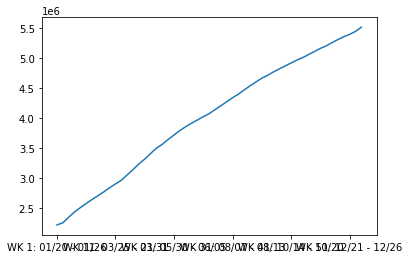

In [ ]:
deaths_sum.plot()

#Which country had the highest death rate?

In [ ]:
death_count = pd.DataFrame(global_df['WK 53: 01/04 - 01/13']).sort_values('WK 53: 01/04 - 01/13', ascending = False).head(10)
death_count

,WK 53: 01/04 - 01/13
Country/Region,
US,846463
Brazil,620830
India,485131
Russia,312733
Mexico,300912
Peru,203157
United Kingdom,151833
Indonesia,144155
Italy,140188


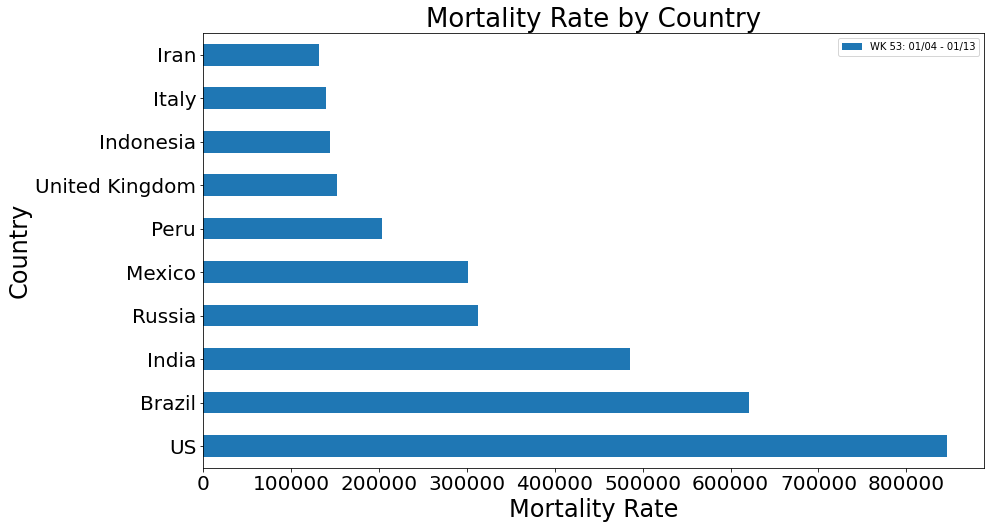

In [ ]:
covid_outcomes_plt = death_count.plot(kind='barh', figsize=(14, 8))
covid_outcomes_plt.set_ylabel("Country", fontsize=24)
covid_outcomes_plt.set_xlabel("Mortality Rate", fontsize=24)
covid_outcomes_plt.set_title("Mortality Rate by Country", fontsize=26)

for item in (covid_outcomes_plt.get_xticklabels() + covid_outcomes_plt.get_yticklabels()):
    item.set_fontsize(20)

#Confirmed Covid Cases

In [ ]:
df2 = pd.read_csv('time_series_covid19_confirmed_global .csv')

confirmed_df = df2.copy()

In [ ]:
confirmed_df.drop('Province/State', axis= 1, inplace = True)

In [ ]:
confirmed_df['WK 1: 01/20 - 01/26'] = confirmed_df['1/26/21']
confirmed_df['WK 2: 01/22 - 01/28'] = confirmed_df['1/28/21']
confirmed_df['WK 3: 01/29 - 02/04'] = confirmed_df['2/4/21']
confirmed_df['WK 4: 02/05 - 02/11'] = confirmed_df['2/11/21']
confirmed_df['WK 5: 02/12 - 02/18'] = confirmed_df['2/18/21']
confirmed_df['WK 6: 02/19 - 02/25'] = confirmed_df['2/25/21']
confirmed_df['WK 7: 02/26 - 03/04'] = confirmed_df['3/4/21']
confirmed_df['WK 8: 03/05 - 03/11'] = confirmed_df['3/11/21']
confirmed_df['WK 9: 03/12 - 03/18'] = confirmed_df['3/18/21']
confirmed_df['WK 10: 03/19 - 03/25'] = confirmed_df['3/25/21']
confirmed_df['WK 11: 03/25 - 03/31'] = confirmed_df['3/31/21']
confirmed_df['WK 12: 04/01 - 04/06'] = confirmed_df['4/6/21']
confirmed_df['WK 13: 04/07 - 04/13'] = confirmed_df['4/13/21']
confirmed_df['WK 14: 04/14 - 04/20'] = confirmed_df['4/20/21']
confirmed_df['WK 15: 04/21 - 04/27'] = confirmed_df['4/27/21']
confirmed_df['WK 16: 04/28 - 05/03'] = confirmed_df['5/3/21']
confirmed_df['WK 17: 05/04 - 05/10'] = confirmed_df['5/10/21']
confirmed_df['WK 18: 05/11 - 05/17'] = confirmed_df['5/17/21']
confirmed_df['WK 19: 05/17 - 05/22'] = confirmed_df['5/22/21']
confirmed_df['WK 20: 05/23 - 05/29'] = confirmed_df['5/29/21']
confirmed_df['WK 21: 05/30 - 06/05'] = confirmed_df['6/5/21']
confirmed_df['WK 22: 06/06 - 06/12'] = confirmed_df['6/12/21']
confirmed_df['WK 23: 06/13 - 06/19'] = confirmed_df['6/19/21']
confirmed_df['WK 24: 06/20 - 06/26'] = confirmed_df['6/26/21']
confirmed_df['WK 25: 06/27 - 07/03'] = confirmed_df['7/3/21']
confirmed_df['WK 26: 07/04 - 07/10'] = confirmed_df['7/10/21']
confirmed_df['WK 27: 07/11 - 07/16'] = confirmed_df['7/16/21']
confirmed_df['WK 28: 07/17 - 07/23'] = confirmed_df['7/23/21']
confirmed_df['WK 29: 07/24 - 07/30'] = confirmed_df['7/30/21']
confirmed_df['WK 30: 07/31 - 08/06'] = confirmed_df['8/6/21']
confirmed_df['WK 31: 08/07 - 08/13'] = confirmed_df['8/13/21']
confirmed_df['WK 32: 08/13 - 08/19'] = confirmed_df['8/19/21']
confirmed_df['WK 33: 08/20 - 08/26'] = confirmed_df['8/26/21']
confirmed_df['WK 34: 08/27 - 09/02'] = confirmed_df['9/2/21']
confirmed_df['WK 35: 09/03 - 09/09'] = confirmed_df['9/9/21']
confirmed_df['WK 36: 09/10 - 09/16'] = confirmed_df['9/16/21']
confirmed_df['WK 37: 09/16 - 09/22'] = confirmed_df['9/22/21']
confirmed_df['WK 38: 09/23 - 09/29'] = confirmed_df['9/29/21']
confirmed_df['WK 39: 09/30 - 10/06'] = confirmed_df['10/6/21']
confirmed_df['WK 40: 10/07 - 10/13'] = confirmed_df['10/13/21']
confirmed_df['WK 41: 10/14 - 10/20'] = confirmed_df['10/20/21']
confirmed_df['WK 42: 10/21 - 10/27'] = confirmed_df['10/27/21']
confirmed_df['WK 43: 10/27 - 11/02'] = confirmed_df['11/2/21']
confirmed_df['WK 44: 11/03 - 11/09'] = confirmed_df['11/9/21']
confirmed_df['WK 45: 11/10 - 11/16'] = confirmed_df['11/16/21']
confirmed_df['WK 46: 11/17 - 11/23'] = confirmed_df['11/23/21']
confirmed_df['WK 47: 11/23 - 11/29'] = confirmed_df['11/29/21']
confirmed_df['WK 48: 11/30 - 12/06'] = confirmed_df['12/6/21']
confirmed_df['WK 49: 12/07 - 12/13'] = confirmed_df['12/13/21']
confirmed_df['WK 50: 12/14 - 12/20'] = confirmed_df['12/20/21']
confirmed_df['WK 51: 12/21 - 12/26'] = confirmed_df['12/26/21']
confirmed_df['WK 52: 12/27 - 01/03'] = confirmed_df['1/3/22']
confirmed_df['WK 53: 01/04 - 01/13'] = confirmed_df['1/13/22']

In [ ]:
confirmed_df.drop(confirmed_df[drop_individual_cols], axis= 1, inplace = True)

In [ ]:
confirmed = pd.DataFrame(confirmed_df.groupby(['Country/Region']).sum()[cols])
confirmed.head()

,WK 1: 01/20 - 01/26,WK 2: 01/22 - 01/28,WK 3: 01/29 - 02/04,WK 4: 02/05 - 02/11,WK 5: 02/12 - 02/18,WK 6: 02/19 - 02/25,WK 7: 02/26 - 03/04,WK 8: 03/05 - 03/11,WK 9: 03/12 - 03/18,WK 10: 03/19 - 03/25,WK 11: 03/25 - 03/31,WK 12: 04/01 - 04/06,WK 13: 04/07 - 04/13,WK 14: 04/14 - 04/20,WK 15: 04/21 - 04/27,WK 16: 04/28 - 05/03,WK 17: 05/04 - 05/10,WK 18: 05/11 - 05/17,WK 19: 05/17 - 05/22,WK 20: 05/23 - 05/29,WK 21: 05/30 - 06/05,WK 22: 06/06 - 06/12,WK 23: 06/13 - 06/19,WK 24: 06/20 - 06/26,WK 25: 06/27 - 07/03,WK 26: 07/04 - 07/10,WK 27: 07/11 - 07/16,WK 28: 07/17 - 07/23,WK 29: 07/24 - 07/30,WK 30: 07/31 - 08/06,WK 31: 08/07 - 08/13,WK 32: 08/13 - 08/19,WK 33: 08/20 - 08/26,WK 34: 08/27 - 09/02,WK 35: 09/03 - 09/09,WK 36: 09/10 - 09/16,WK 37: 09/16 - 09/22,WK 38: 09/23 - 09/29,WK 39: 09/30 - 10/06,WK 40: 10/07 - 10/13,WK 41: 10/14 - 10/20,WK 42: 10/21 - 10/27,WK 43: 10/27 - 11/02,WK 44: 11/03 - 11/09,WK 45: 11/10 - 11/16,WK 46: 11/17 - 11/23,WK 47: 11/23 - 11/29,WK 48: 11/30 - 12/06,WK 49: 12/07 - 12/13,WK 50: 12/14 - 12/20,WK 51: 12/21 - 12/26,WK 52: 12/27 - 01/03,WK 53: 01/04 - 01/13
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,54750,54891,55231,55420,55557,55680,55775,55917,56044,56226,56454,56779,57364,58037,59225,60300,62063,63598,65486,70111,77963,88740,100521,113124,123485,132777,139051,143439,146523,149810,151770,152411,152822,153306,153840,154361,154757,155128,155380,155627,155859,156124,156307,156397,156649,157015,157260,157499,157648,157797,157951,158183,158602
Albania,73691,75454,81993,89776,96838,104313,110521,115442,119528,122767,125157,126936,128752,129842,130736,131276,131753,132032,132176,132297,132374,132449,132488,132509,132534,132587,132647,132828,133036,133591,135140,137597,142253,148222,154316,160365,165096,169462,173190,176172,179463,183282,186222,190125,193856,197167,199750,201902,203925,205897,207709,210885,226598
Algeria,106097,106610,108381,110049,111418,112622,113761,114851,115842,116543,117192,117879,118799,119992,121344,122717,124288,125485,126651,128456,130681,133070,135586,138113,141007,145296,151103,159563,170189,179216,185902,190078,193674,196915,199275,200989,202122,203198,204171,204900,205529,206069,206649,207385,208245,209283,210344,211662,213058,214835,216637,219532,224383
Andorra,9638,9779,10137,10391,10610,10799,10976,11130,11393,11687,12010,12328,12614,12874,13121,13295,13429,13555,13569,13693,13758,13813,13842,13882,13918,14075,14273,14498,14678,14836,14924,14981,15016,15052,15078,15113,15153,15209,15284,15314,15382,15462,15516,15717,15929,16342,16712,18631,19440,21062,21730,24502,28899
Angola,19553,19672,19996,20261,20452,20695,20981,21205,21558,21914,22311,22885,23697,24661,25942,27133,28875,30787,32149,34180,35594,36600,37604,38528,39172,39881,40631,41629,42646,43487,44328,45325,46726,48004,49628,51827,53387,56583,60448,62143,63340,64126,64487,64762,64940,65061,65155,65259,65404,66086,71752,83764,92581


##Total number of confirmed cased each week

In [ ]:
confirmed_sum =  confirmed.sum(axis=0)

print('Total number of Confirmed Cases each week internationally:\n \n', confirmed_sum)

Total number of Confirmed Cases each week internationally:
 
 WK 1: 01/20 - 01/26     100572800
WK 2: 01/22 - 01/28     101789728
WK 3: 01/29 - 02/04     105192402
WK 4: 02/05 - 02/11     108145441
WK 5: 02/12 - 02/18     110697550
WK 6: 02/19 - 02/25     113392583
WK 7: 02/26 - 03/04     116061724
WK 8: 03/05 - 03/11     118967291
WK 9: 03/12 - 03/18     122192273
WK 10: 03/19 - 03/25    125915944
WK 11: 03/25 - 03/31    129330627
WK 12: 04/01 - 04/06    132864617
WK 13: 04/07 - 04/13    137892551
WK 14: 04/14 - 04/20    143410303
WK 15: 04/21 - 04/27    149179116
WK 16: 04/28 - 05/03    154025335
WK 17: 05/04 - 05/10    159424543
WK 18: 05/11 - 05/17    164083686
WK 19: 05/17 - 05/22    166857926
WK 20: 05/23 - 05/29    170425799
WK 21: 05/30 - 06/05    173454578
WK 22: 06/06 - 06/12    176133769
WK 23: 06/13 - 06/19    178658285
WK 24: 06/20 - 06/26    181257735
WK 25: 06/27 - 07/03    183933652
WK 26: 07/04 - 07/10    186962724
WK 27: 07/11 - 07/16    190002704
WK 28: 07/17 - 07/23

##Plot displaying confirmed cases

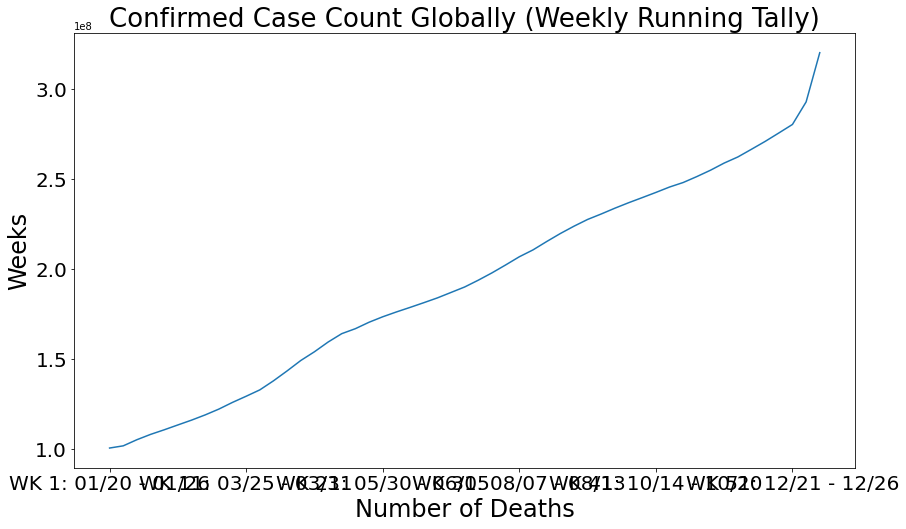

In [ ]:
confirmed_plt = confirmed_sum.plot(kind='line', figsize=(14, 8))
confirmed_plt.set_ylabel("Weeks", fontsize=24)
confirmed_plt.set_xlabel("Number of Deaths", fontsize=24)
confirmed_plt.set_title("Confirmed Case Count Globally (Weekly Running Tally)", fontname='Arial', fontsize=26)

for item in (confirmed_plt.get_xticklabels() + confirmed_plt.get_yticklabels()):
    item.set_fontsize(20)

#What were the mortality rates in each country?

To calculate the fatality rate we must divide the total number of confirmed patients by the number of patients who have died from the Coronavirus.

Mortality Rate = Deaths/Confirmed

In [ ]:
confirmed_cases = pd.DataFrame(confirmed['WK 53: 01/04 - 01/13'])
death_toll = pd.DataFrame(global_df['WK 53: 01/04 - 01/13'])

In [ ]:
covid_concat1 = confirmed_cases.join(death_toll, lsuffix='covid_concat1', rsuffix='Deaths')
covid_concat1.head()
covid_outcomes = pd.DataFrame(covid_concat1)
covid_columns = ['Cases','Deaths']
covid_outcomes.columns = covid_columns
print('Total COVID-19 case count dataset sorted by \n Confirmed, Recovered, and Deaths')
covid_outcomes.head(3)

Total COVID-19 case count dataset sorted by 
 Confirmed, Recovered, and Deaths


,Cases,Deaths
Country/Region,,
Afghanistan,158602,7376
Albania,226598,3255
Algeria,224383,6383


In [ ]:
covid_outcomes['Mortality Rates'] = covid_outcomes.Deaths/covid_outcomes.Cases
covid_outcomes.head(3)


,Cases,Deaths,Mortality Rates
Country/Region,,,
Afghanistan,158602,7376,0.046506
Albania,226598,3255,0.014365
Algeria,224383,6383,0.028447


In [ ]:
covid_outcomes[['Mortality Rates']].sort_values('Mortality Rates', ascending=False).head(10)

,Mortality Rates
Country/Region,
MS Zaandam,0.222222
Yemen,0.194176
Vanuatu,0.142857
Peru,0.082126
Mexico,0.070674
Sudan,0.067273
Ecuador,0.060182
Syria,0.058047
Egypt,0.055616


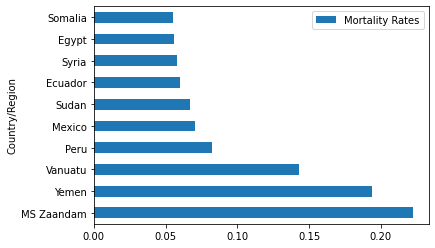

In [ ]:
mortality_rates_plt = covid_outcomes[['Mortality Rates']].sort_values('Mortality Rates', ascending=False).head(10)

mortality_rates_plt.plot(kind = 'barh')

#Exporting DataFrames to CSV

These dataframes as csv files will be uploaded Tableau for further visusaliations and analysis.